In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_names = []
for i in range(1, 11):
    item = 'load_stimulus_exp{}.csv'.format(i)
    file_names.append(item)

folder_path = os.path.abspath(os.path.join("../datasets"))
load_stimulus_global = pd.DataFrame()

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)
    load_stimulus_global = pd.concat([load_stimulus_global, df], ignore_index=True)

# Save the combined DataFrame as a new CSV file
abs_path = os.path.join("..\\datasets", 'load_stimulus_global.csv')
load_stimulus_global.to_csv(abs_path, index=False)


In [4]:
current_dir = os.getcwd()

exp_ls = "load_stimulus_global.csv"
#exp_ls="load_stimulus_exp1.csv"
file_path = os.path.abspath(os.path.join("..\\datasets", exp_ls))

data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1780 entries, 0 to 177
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   input_rate                          1780 non-null   float64
 1   output_rate                         1780 non-null   float64
 2   latency                             1780 non-null   float64
 3   firewall_instructions               1780 non-null   float64
 4   nf_router_instructions              1780 non-null   float64
 5   ndpi_stats_instructions             1780 non-null   float64
 6   payload_scan_instructions           1780 non-null   float64
 7   bridge_instructions                 1780 non-null   float64
 8   firewall_branches                   1780 non-null   float64
 9   nf_router_branches                  1780 non-null   float64
 10  ndpi_stats_branches                 1780 non-null   float64
 11  payload_scan_branches               1780 non

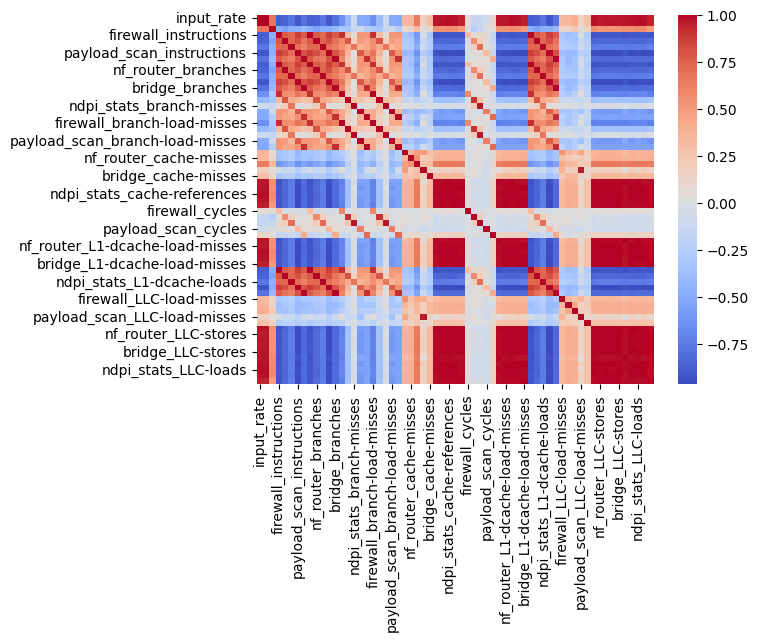

In [5]:
# heatmap
import seaborn as sns   
corr = data.corr()
plt.figure()
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")
plt.show()

In [6]:
# Reset the index starting from 0
data = data.reset_index(drop=True)
data

input_rate  output_rate  latency  firewall_instructions  \
0     187.224333   185.229798    8.963           1.121128e+10   
1     516.725065   528.201666    6.377           1.123944e+10   
2     528.457327   528.471292    8.489           1.123918e+10   
3     528.405466   528.386996    6.083           1.115283e+10   
4     528.280111   528.273735    6.669           1.114634e+10   
...          ...          ...      ...                    ...   
1775  528.304727   528.279457    7.984           1.039272e+10   
1776  528.163537   528.143816   10.436           1.106339e+10   
1777  528.181344   528.193240    7.571           1.106637e+10   
1778  528.257088   528.244387    7.856           1.106855e+10   
1779  528.156461   528.196065    6.829           1.105939e+10   

      nf_router_instructions  ndpi_stats_instructions  \
0               1.088710e+10             1.097567e+10   
1               1.103156e+10             1.106136e+10   
2               1.093461e+10             1.105879e+10   
3               1.110961e+10             1.040465e+10   
4               1.111768e+10             1.104884e+10   
...                      ...                      ...   
1775            4.937809e+09             1.100087e+10   
1776            4.945872e+09             1.101974e+10   
1777            4.946184e+09             1.101764e+10   
1778            4.876261e+09             1.102374e+10   
1779            4.869291e+09             1.101165e+10   

      payload_scan_instructions  bridge_instructions  firewall_branches  \
0                  1.071371e+10         1.089431e+10       2.199691e+09   
1                  1.090837e+10         1.099876e+10       2.214683e+09   
2                  1.084090e+10         1.101288e+10       2.214670e+09   
3                  1.102334e+10         1.101689e+10       2.202532e+09   
4                  1.102454e+10         1.100556e+10       2.201304e+09   
...                         ...                  ...                ...   
1775               1.078004e+10         1.081339e+10       2.008173e+09   
1776               1.084847e+10         1.085886e+10       2.156310e+09   
1777               1.102158e+10         1.103224e+10       2.180885e+09   
1778               1.101932e+10         1.102733e+10       2.181184e+09   
1779               1.101963e+10         1.102879e+10       2.179842e+09   

      nf_router_branches  ...  firewall_LLC-stores  nf_router_LLC-stores  \
0           2.158305e+09  ...             834535.0              895849.0   
1           2.178411e+09  ...             859218.0              914788.0   
2           2.164707e+09  ...             874257.0              933491.0   
3           2.161446e+09  ...             859178.0              928322.0   
4           2.178992e+09  ...             865321.0              915119.0   
...                  ...  ...                  ...                   ...   
1775        9.738864e+08  ...             907775.0              954458.0   
1776        9.751099e+08  ...             931882.0              980508.0   
1777        9.754146e+08  ...             943730.0              980374.0   
1778        9.653966e+08  ...             941239.0              986006.0   
1779        9.637707e+08  ...             935970.0              958647.0   

      ndpi_stats_LLC-stores  payload_scan_LLC-stores  bridge_LLC-stores  \
0                  826518.0                 882691.0           711973.0   
1                  849676.0                 901211.0           733000.0   
2                  860351.0                 920450.0           745286.0   
3                  860363.0                 910669.0           742446.0   
4                  844880.0                 901566.0           729822.0   
...                     ...                      ...                ...   
1775               803313.0                 894700.0           709400.0   
1776               819043.0                 934299.0           741995.0   
1777               830687.0                 947226.

<Axes: >

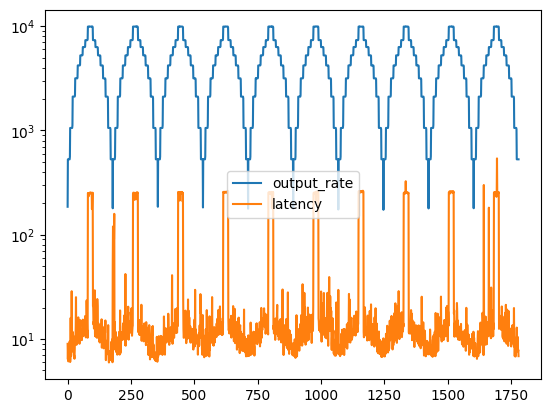

In [7]:
data.iloc[:, 1:3].plot(logy=True)

In [8]:
corr = data.corr()
correlation_list = []
for i in range(1,2):
    for j in range(i+1, len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between output_rate and ndpi_stats_LLC-loads: 0.98
Correlation between output_rate and ndpi_stats_L1-dcache-load-misses: 0.98
Correlation between output_rate and ndpi_stats_cache-references: 0.98
Correlation between output_rate and payload_scan_LLC-loads: 0.98
Correlation between output_rate and payload_scan_cache-references: 0.97
Correlation between output_rate and nf_router_LLC-loads: 0.97
Correlation between output_rate and payload_scan_L1-dcache-load-misses: 0.97
Correlation between output_rate and firewall_LLC-stores: 0.97
Correlation between output_rate and nf_router_cache-references: 0.97
Correlation between output_rate and nf_router_L1-dcache-load-misses: 0.97
Correlation between output_rate and firewall_cache-references: 0.97
Correlation between output_rate and bridge_LLC-stores: 0.97
Correlation between output_rate and ndpi_stats_LLC-stores: 0.97
Correlation between output_rate and firewall_L1-dcache-load-misses: 0.97
Correlation between output_rate and firewall_L

In [9]:
corr = data.corr()
correlation_list = []
for i in range(2,3):
    for j in range(len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between latency and latency: 1.00
Correlation between latency and input_rate: 0.67
Correlation between latency and output_rate: 0.67
Correlation between latency and ndpi_stats_LLC-loads: 0.59
Correlation between latency and ndpi_stats_cache-references: 0.58
Correlation between latency and ndpi_stats_L1-dcache-load-misses: 0.57
Correlation between latency and payload_scan_LLC-loads: 0.57
Correlation between latency and firewall_LLC-loads: 0.56
Correlation between latency and firewall_cache-references: 0.56
Correlation between latency and firewall_L1-dcache-load-misses: 0.56
Correlation between latency and payload_scan_cache-references: 0.56
Correlation between latency and nf_router_LLC-loads: 0.56
Correlation between latency and payload_scan_L1-dcache-load-misses: 0.56
Correlation between latency and firewall_LLC-stores: 0.56
Correlation between latency and nf_router_L1-dcache-loads: 0.56
Correlation between latency and nf_router_instructions: 0.55
Correlation between latenc

# Resource stimulus

In [10]:
resouce_stimulus_global = pd.DataFrame()
file_names = []
file_names_1 = []
for i in range(3, 8):
    for j in [1,3]:
        for k in range(1,6):
            item = 'resource_stimulus_exp-{}-{}-{}.csv'.format(i,j,k)
            file_names.append(item)

print(file_names) 
        
folder_path = os.path.abspath(os.path.join("../datasets"))
resource_stimulus_global = pd.DataFrame()

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)
    resource_stimulus_global = pd.concat([resource_stimulus_global, df], ignore_index=True)

# Save the combined DataFrame as a new CSV file
abs_path = os.path.join("..\\datasets", 'resource_stimulus_global.csv')
resource_stimulus_global.to_csv(abs_path, index=False)

['resource_stimulus_exp-3-1-1.csv', 'resource_stimulus_exp-3-1-2.csv', 'resource_stimulus_exp-3-1-3.csv', 'resource_stimulus_exp-3-1-4.csv', 'resource_stimulus_exp-3-1-5.csv', 'resource_stimulus_exp-3-3-1.csv', 'resource_stimulus_exp-3-3-2.csv', 'resource_stimulus_exp-3-3-3.csv', 'resource_stimulus_exp-3-3-4.csv', 'resource_stimulus_exp-3-3-5.csv', 'resource_stimulus_exp-4-1-1.csv', 'resource_stimulus_exp-4-1-2.csv', 'resource_stimulus_exp-4-1-3.csv', 'resource_stimulus_exp-4-1-4.csv', 'resource_stimulus_exp-4-1-5.csv', 'resource_stimulus_exp-4-3-1.csv', 'resource_stimulus_exp-4-3-2.csv', 'resource_stimulus_exp-4-3-3.csv', 'resource_stimulus_exp-4-3-4.csv', 'resource_stimulus_exp-4-3-5.csv', 'resource_stimulus_exp-5-1-1.csv', 'resource_stimulus_exp-5-1-2.csv', 'resource_stimulus_exp-5-1-3.csv', 'resource_stimulus_exp-5-1-4.csv', 'resource_stimulus_exp-5-1-5.csv', 'resource_stimulus_exp-5-3-1.csv', 'resource_stimulus_exp-5-3-2.csv', 'resource_stimulus_exp-5-3-3.csv', 'resource_stimulus_

In [11]:
current_dir = os.getcwd()

exp_rs = "resource_stimulus_global.csv"

file_path = os.path.abspath(os.path.join("..\\datasets", exp_rs))

data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 0 to 45
Data columns (total 78 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   input_rate                          2284 non-null   float64
 1   output_rate                         2284 non-null   float64
 2   firewall_instructions               2284 non-null   float64
 3   nf_router_instructions              2284 non-null   float64
 4   ndpi_stats_instructions             2284 non-null   float64
 5   payload_scan_instructions           2284 non-null   float64
 6   bridge_instructions                 2284 non-null   float64
 7   firewall_branches                   2284 non-null   float64
 8   nf_router_branches                  2284 non-null   float64
 9   ndpi_stats_branches                 2284 non-null   float64
 10  payload_scan_branches               2284 non-null   float64
 11  bridge_branches                     2284 non-

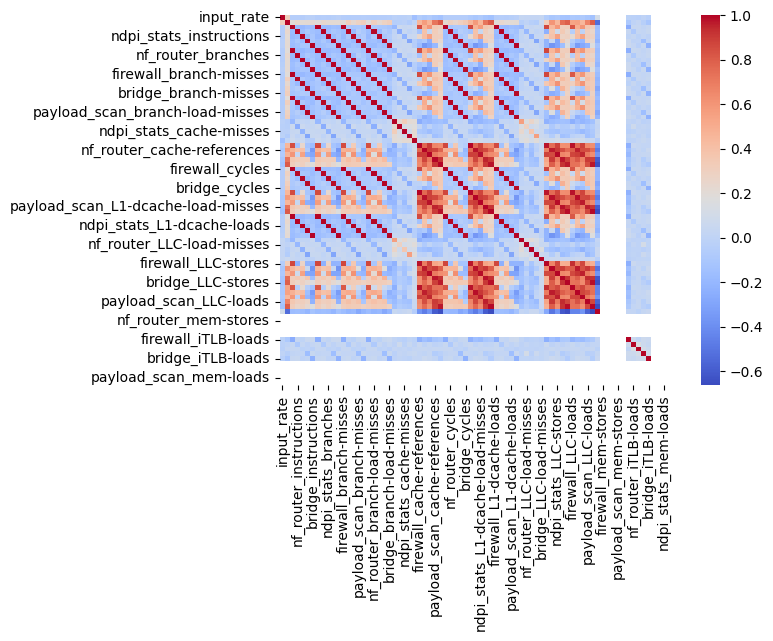

In [12]:
# heatmap
import seaborn as sns   
corr = data.corr()
plt.figure()
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")
plt.show()

In [13]:
# Reset the index starting from 0
data = data.reset_index(drop=True)
data

input_rate  output_rate  firewall_instructions  nf_router_instructions  \
0      437.485913   408.289094           1.007456e+10            1.023861e+10   
1     1946.264200  2087.554913           1.003758e+10            1.023424e+10   
2     2112.990288  2109.825867           1.002860e+10            1.011452e+10   
3     2113.241497  2110.122887           1.001283e+10            1.007096e+10   
4     2113.282442  2111.026947           1.001703e+10            1.022266e+10   
...           ...          ...                    ...                     ...   
2279  2113.231027  2111.061204           1.011092e+10            1.005456e+10   
2280  2113.091275  2111.659747           1.003967e+10            1.010051e+10   
2281  2113.161550  2110.611039           1.002225e+10            1.023681e+10   
2282  2113.002816  2110.378591           1.001656e+10            1.023499e+10   
2283  2112.968968  2109.596582           1.003401e+10            1.033923e+10   

      ndpi_stats_instructions  payload_scan_instructions  bridge_instructions  \
0                1.007545e+10               1.017486e+10         1.017149e+10   
1                1.003521e+10               1.017753e+10         1.016055e+10   
2                1.001347e+10               1.017163e+10         1.014080e+10   
3                9.194822e+09               1.016614e+10         9.937670e+09   
4                9.924643e+09               1.015817e+10         1.004848e+10   
...                       ...                        ...                  ...   
2279             9.777458e+09               9.866212e+09         9.890201e+09   
2280             9.814001e+09               1.018566e+10         1.015294e+10   
2281             9.934005e+09               1.017895e+10         1.015468e+10   
2282             9.930095e+09               1.017085e+10         1.015106e+10   
2283             1.003288e+10               1.017214e+10         1.015406e+10   

      firewall_branches  nf_router_branches  ndpi_stats_branches  ...  \
0          1.953639e+09        2.032784e+09         1.986191e+09  ...   
1          1.964291e+09        2.025162e+09         1.971102e+09  ...   
2          1.960454e+09        2.006851e+09         1.968240e+09  ...   
3          1.974081e+09        1.999396e+09         1.817389e+09  ...   
4          1.974356e+09        2.023176e+09         1.954416e+09  ...   
...                 ...                 ...                  ...  ...   
2279       1.963701e+09        1.996518e+09         1.933514e+09  ...   
2280       1.965180e+09        2.005148e+09         1.939415e+09  ...   
2281       1.960511e+09        2.025402e+09         1.956688e+09  ...   
2282       1.975234e+09        2.006311e+09         1.938396e+09  ...   
2283       1.977963e+09        2.023308e+09         1.954952e+09  ...   

      firewall_iTLB-loads  nf_router_iTLB-loads  ndpi_stats_iTLB-loads  \
0                     NaN                   NaN                    NaN   
1                     NaN                   NaN                    NaN   
2                     NaN                   NaN                    NaN   
3                     NaN                   NaN                    NaN   
4                     NaN                   NaN                    NaN   
...                   ...                   ...                    ...   
2279                  0.0                  33.0                   58.0   
2280                 17.0                   9.0                   37.0   
2281                 34.0                 825.0                    0.0   
2282                 64.0                   0.0                    0.0   
2283                 17.0                  28.0                    0.0   

      payload_scan_iTLB-loads  bridge_iTLB-loads  firewall_mem-loads  \
0                         NaN                NaN                 NaN   
1                         NaN                NaN                 NaN   
2                         NaN                NaN                 NaN   
3      

<Axes: >

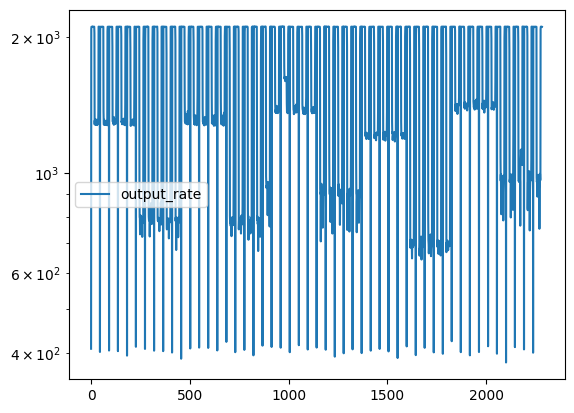

In [14]:
data.iloc[:, 1:2].plot(logy=True)

In [15]:
corr = data.corr()
correlation_list = []
for i in range(1,2):
    for j in range(i+1, len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between output_rate and bridge_cache-references: 0.81
Correlation between output_rate and bridge_L1-dcache-load-misses: 0.81
Correlation between output_rate and bridge_LLC-loads: 0.80
Correlation between output_rate and bridge_LLC-stores: 0.80
Correlation between output_rate and payload_scan_LLC-stores: 0.74
Correlation between output_rate and payload_scan_cache-references: 0.73
Correlation between output_rate and payload_scan_L1-dcache-load-misses: 0.72
Correlation between output_rate and payload_scan_LLC-loads: 0.67
Correlation between output_rate and nf_router_LLC-stores: 0.60
Correlation between output_rate and nf_router_L1-dcache-load-misses: 0.58
Correlation between output_rate and nf_router_cache-references: 0.58
Correlation between output_rate and nf_router_LLC-loads: 0.55
Correlation between output_rate and latency: 0.54
Correlation between output_rate and firewall_LLC-loads: 0.54
Correlation between output_rate and ndpi_stats_cache-references: 0.46
Correlation bet

In [16]:
corr = data.corr()
correlation_list = []
for i in range(62,63):
    for j in range( len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between latency and latency: 1.00
Correlation between latency and bridge_L1-dcache-load-misses: 0.66
Correlation between latency and bridge_LLC-loads: 0.66
Correlation between latency and bridge_LLC-stores: 0.65
Correlation between latency and bridge_cache-references: 0.65
Correlation between latency and payload_scan_LLC-stores: 0.61
Correlation between latency and payload_scan_cache-references: 0.60
Correlation between latency and payload_scan_L1-dcache-load-misses: 0.60
Correlation between latency and payload_scan_LLC-loads: 0.57
Correlation between latency and output_rate: 0.54
Correlation between latency and nf_router_LLC-stores: 0.50
Correlation between latency and nf_router_L1-dcache-load-misses: 0.47
Correlation between latency and nf_router_cache-references: 0.47
Correlation between latency and nf_router_LLC-loads: 0.45
Correlation between latency and firewall_LLC-loads: 0.45
Correlation between latency and firewall_L1-dcache-load-misses: 0.38
Correlation between la

In [18]:
# combine random_rates

file_names = ["random_rates_exp-1.csv","random_rates_exp-2.csv"]

folder_path = os.path.abspath(os.path.join("../datasets"))
load_stimulus_random_rates = pd.DataFrame()

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)
    load_stimulus_random_rates = pd.concat([load_stimulus_random_rates, df], ignore_index=True)

# Save the combined DataFrame as a new CSV file
abs_path = os.path.join("..\\datasets", 'load_stimulus_random_rates.csv')
load_stimulus_random_rates.to_csv(abs_path, index=False)


In [19]:
# combine intervention
file_names = []
for i in range(25,35):
    item = 'intervention_exp-{}.csv'.format(i)
    file_names.append(item)

folder_path = os.path.abspath(os.path.join("../datasets"))
intervention_global_1 = pd.DataFrame()

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)
    intervention_global_1 = pd.concat([intervention_global_1, df], ignore_index=True)

# Save the combined DataFrame as a new CSV file
abs_path = os.path.join("..\\datasets", 'intervention_global_1.csv')
intervention_global_1.to_csv(abs_path, index=False)

current_dir = os.getcwd()

exp_ls = "intervention_global_1.csv"
#exp_ls="load_stimulus_exp1.csv"
file_path = os.path.abspath(os.path.join("..\\datasets", exp_ls))

data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21578 entries, 0 to 2849
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   firewall_instructions               21561 non-null  float64
 1   nf_router_instructions              21553 non-null  float64
 2   ndpi_stats_instructions             21552 non-null  float64
 3   payload_scan_instructions           21559 non-null  float64
 4   bridge_instructions                 21552 non-null  float64
 5   firewall_branches                   21566 non-null  float64
 6   nf_router_branches                  21565 non-null  float64
 7   ndpi_stats_branches                 21564 non-null  float64
 8   payload_scan_branches               21567 non-null  float64
 9   bridge_branches                     21565 non-null  float64
 10  firewall_branch-misses              21572 non-null  float64
 11  nf_router_branch-misses             21573 

In [20]:
# Reset the index starting from 0
data = data.reset_index(drop=True)
data

firewall_instructions  nf_router_instructions  ndpi_stats_instructions  \
0               1.784380e+05            2.166442e+09             2.344566e+09   
1               8.725932e+08            7.433388e+09             7.938936e+09   
2               2.343685e+09            6.866432e+09             4.867167e+09   
3               2.386229e+09            7.035409e+09             4.724220e+09   
4               2.376255e+09            6.991497e+09             4.946863e+09   
...                      ...                     ...                      ...   
21573           7.962502e+09            7.892241e+09             7.868706e+09   
21574           7.515474e+09            7.925682e+09             7.823012e+09   
21575           7.381892e+09            7.495733e+09             7.434971e+09   
21576           7.563969e+09            7.469506e+09             7.326896e+09   
21577           7.579644e+09            7.408511e+09             7.418678e+09   

       payload_scan_instructions  bridge_instructions  firewall_branches  \
0                   3.594936e+09         3.623531e+09       3.567800e+04   
1                   8.983584e+09         8.797672e+09       1.668305e+08   
2                   7.690254e+09         6.642576e+09       4.718919e+08   
3                   7.111924e+09         7.142203e+09       4.858310e+08   
4                   2.972079e+09         6.608453e+09       4.800007e+08   
...                          ...                  ...                ...   
21573               7.165000e+09         9.569379e+09       1.584457e+09   
21574               7.297206e+09         9.392759e+09       1.487400e+09   
21575               6.898812e+09         9.089272e+09       1.469360e+09   
21576               6.773307e+09         8.966362e+09       1.470878e+09   
21577               6.893705e+09                  NaN       1.489056e+09   

       nf_router_branches  ndpi_stats_branches  payload_scan_branches  \
0            4.301991e+08         4.412206e+08           6.953730e+08   
1            1.462517e+09         1.558124e+09           1.785756e+09   
2            1.388445e+09         9.335953e+08           1.551510e+09   
3            1.420111e+09         8.937214e+08           1.446139e+09   
4            1.401817e+09         9.521797e+08           6.008605e+08   
...                   ...                  ...                    ...   
21573        1.571428e+09         1.550379e+09           1.416005e+09   
21574        1.579090e+09         1.540602e+09           1.451313e+09   
21575        1.495661e+09         1.456561e+09           1.368786e+09   
21576        1.488276e+09         1.439725e+09           1.349429e+09   
21577        1.479491e+09         1.452366e+09           1.341191e+09   

       bridge_branches  ...  payload_scan_LLC-stores  bridge_LLC-stores  \
0         7.002405e+08  ...                    495.0              492.0   
1         1.744504e+09  ...                3387104.0          3929469.0   
2         1.329289e+09  ...                7419949.0          7177319.0   
3         1.404327e+09  ...                7179664.0          6368610.0   
4         1.279155e+09  ...                7869184.0          7506020.0   
...                ...  ...                      ...                ...   
21573     1.893127e+09  ...                6869343.0          2469471.0   
21574     1.859968e+09  ...                7951588.0          2624206.0   
21575     1.796230e+09  ...                9588583.0          3513319.0   
21576     1.778916e+09  ...                9730217.0          3600477.0   
21577              NaN  ...                9582875.0                NaN   

       firewall_LLC-loads  nf_router_LLC-loads  ndpi_stats_LLC-loads  \
0                     NaN               2428.0                1706.0   
1               7939506.0            7486359.0            12499511.0   
2              22362862.0           18335905.0            27947413.0   
3              21586524.0           16167112.0         

<Axes: >

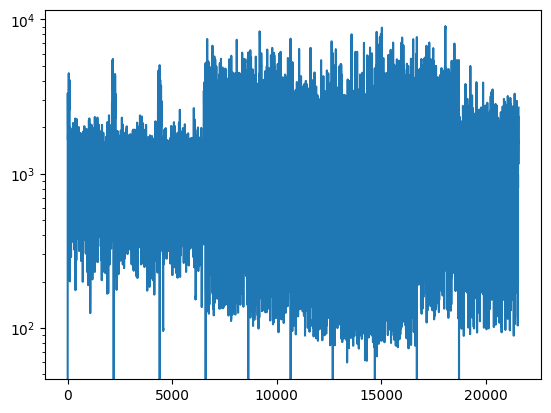

In [25]:
data.iloc[:, 61].plot(logy=True)